In [1]:
import numpy as np 
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/wine-quality-classification/wine_quality_classification.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#veri okundu
df = pd.read_csv('/kaggle/input/wine-quality-classification/wine_quality_classification.csv')

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fixed_acidity   1000 non-null   float64
 1   residual_sugar  1000 non-null   float64
 2   alcohol         1000 non-null   float64
 3   density         1000 non-null   float64
 4   quality_label   1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


,fixed_acidity,residual_sugar,alcohol,density
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,10.174300,7.69200,11.039900,0.997505
std,3.452693,4.20892,1.760283,0.004300
min,4.000000,0.50000,8.000000,0.990000
25%,7.100000,4.10000,9.500000,0.993900
50%,10.400000,7.55000,11.000000,0.997400
75%,13.125000,11.50000,12.600000,1.001200
max,16.000000,15.00000,14.000000,1.005000


In [4]:
#boş olanların toplamını getir dedik boş veri yok çıktı
df.isnull().sum()

fixed_acidity     0
residual_sugar    0
alcohol           0
density           0
quality_label     0
dtype: int64

In [5]:
df.dtypes  # Tüm sütunların veri tipini göster
df.columns #sütun isimleri getirdik

Index(['fixed_acidity', 'residual_sugar', 'alcohol', 'density',
       'quality_label'],
      dtype='object')

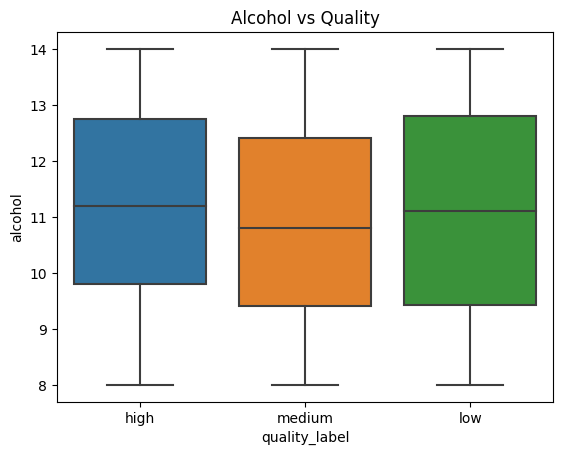

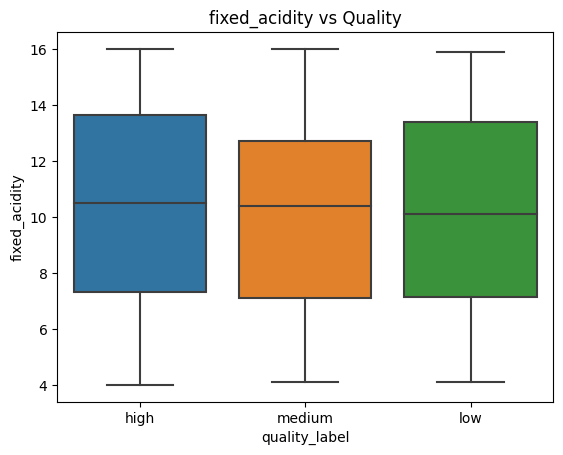

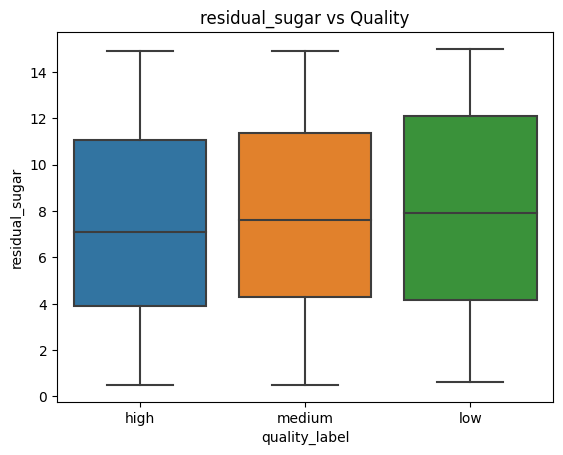

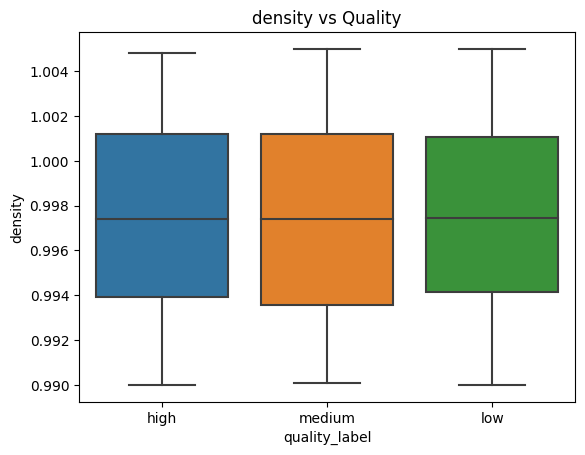

In [6]:
#Veri görselleştirme kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

# Örnek: Alkol seviyesinin kaliteye etkisini boxplot ile göster
sns.boxplot(x='quality_label', y='alcohol', data=df)
plt.title('Alcohol vs Quality')
plt.show()

# Aynısını diğer değişkenler için de yap: for döngüsüne almışız
for col in ['fixed_acidity', 'residual_sugar', 'density']:
    sns.boxplot(x='quality_label', y=col, data=df)
    plt.title(f'{col} vs Quality')
    plt.show()


In [7]:
# quality label ı numerikleşetirdim
label_map = {'low': 0, 'medium': 1, 'high': 2}
df['quality_label_encoded'] = df['quality_label'].map(label_map)
print(df[['quality_label', 'quality_label_encoded']].head())


  quality_label  quality_label_encoded
0          high                      2
1        medium                      1
2           low                      0
3           low                      0
4        medium                      1


Aşağıdaki kod parçası, makine öğrenmesinde en temel adımlardan biri olan veri bölme (**train/validation/test)** işleminin ilk safhasını yapıyor.

**train_test_split**

* Scikit-learn’ün veri ayırma fonksiyonudur.Tek satırla rastgele (ancak kontrollü) bir bölme yapar.

 **X / y ayrımı**

 
*  X: Modelin giriş olarak kullanacağı kimyasal ölçümler (fixed_acidity, density, …).
*  df.drop('quality_label_encoded', axis=1) → hedef sütunu kaldır, geriye tüm özellikler kalsın.
*  y: Modelin tahmin etmeyi öğreneceği etiket (0 = low, 1 = medium, 2 = high).

Bu ayrım her modelde şarttır: ***X = input, y = output***.

**stratify=y kullanırsan**

Her parçaya (train, validation, test) aynı yüzdeyle Low-Medium-High dağıtılır. Model tüm sınıfları hem öğrenir hem de adilce değerlendirilir.





In [8]:
# train= %60 ,validation = %20, test = %20
from sklearn.model_selection import train_test_split
X = df.drop('quality_label_encoded', axis=1)
y = df['quality_label_encoded']
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4, # toplam verinin %40'ı temp'e
    random_state=42,# tekrarlanabilirlik için, 	Kod her çalıştığında aynı bölme işlemini üretir; sonuçlar tekrarlanabilir olur.
    stratify=y # sınıf oranlarını koru, Bölme yapılırken Low/Medium/High oranları her parçaya aynı oranda dağıtıldı.
)


| Parça                | Veri yüzdesi                                                                                                                              | Kullanım amacı |
| -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- | -------------- |
| **train (%60)**      | Model **öğrenir**.                                                                                                                        |                |
| **validation (%20)** | Hyper-parametre ayarı, model seçimi, erken durdurma. Model bu verinin sonuçlarını görür, ama **ağırlıkları bu veriye göre güncellenmez**. |                |
| **test (%20)**       | Model tamamen hazırlandıktan **sonra** tek seferlik final sınav. Performansı gerçek hayatta beklenen başarıyı yansıtır.                   |                |


In [9]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,   # temp'in yarısı = toplam verinin %20'si
    random_state=42,
    stratify=y_temp
)


In [10]:
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

# Sınıf dağılımını kontrol et
print("Train label distribution:\n", y_train.value_counts(normalize=True))
print("Validation label distribution:\n", y_val.value_counts(normalize=True))
print("Test label distribution:\n", y_test.value_counts(normalize=True))


Train: (600, 5)
Validation: (200, 5)
Test: (200, 5)
Train label distribution:
 quality_label_encoded
1    0.355000
2    0.343333
0    0.301667
Name: proportion, dtype: float64
Validation label distribution:
 quality_label_encoded
1    0.355
2    0.345
0    0.300
Name: proportion, dtype: float64
Test label distribution:
 quality_label_encoded
1    0.355
2    0.340
0    0.305
Name: proportion, dtype: float64


In [12]:
#, Random Forest sınıflandırma modeli kurmak ve 
#bu modelin başarısını ölçmek için scikit-learn kütüphanesinden gerekli araçları içe aktarma 

from sklearn.ensemble import RandomForestClassifier

#Bu satırda üç farklı değerlendirme aracı içe aktarılıyor:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# accuracy_score = Modelin toplam doğru tahmin oranı.
# classificaiton_report = Tablo biçiminde metin – hangi sınıfı ne kadar iyi bildiğini tek tek gösterir.
# confusion_matrix = Kare biçimli tam sayı matris.


🔹 RandomForestClassifier
1. Eğitim verisinin rastgele alt örnekleri alınır.
2. Her alt örnekte rastgele özellikler seçilerek karar ağaçları eğitilir.
3. Tahmin aşamasında tüm ağaçların “oy”ları alınır (çoğunluğu kazanan sınıf sonuç olur).

 Tek bir ağaca göre daha isabetli, daha az overfitting eğilimlidir; sayısal ve kategorik verilerle doğal olarak çalışır.

In [15]:
print(X_train.columns)

Index(['fixed_acidity', 'residual_sugar', 'alcohol', 'density',
       'quality_label'],
      dtype='object')


In [16]:
# Kategorik sütunu çıkar ve doğru target ile yeniden oluştur
X = df.drop(['quality_label', 'quality_label_encoded'], axis=1)
y = df['quality_label_encoded']


In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [18]:
# Modeli oluştur
rf_model = RandomForestClassifier(random_state=42)

# Eğit
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
# eğittiğin Random Forest modelini kullan, validation kümesindeki her satır için kalite sınıfını tahmin et
y_val_pred = rf_model.predict(X_val)


* Precision (Kesinlik) – “Bu sınıf dediklerimin kaçı gerçekten bu sınıf?”
* Recall (Duyarlılık) – “Gerçekten bu sınıf olanların kaçı yakalandı?”
* F1-Score – Precision ve Recall’un dengeli ortalaması
* Support – O sınıfa ait gerçek örnek sayısı.


* **Macro average:** Sınıflar arasında basit ortalama.
* **Weighted average:** Her sınıfı support (örnek sayısı) ile ağırlıklı ortalama.



In [20]:
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred, target_names=['Low', 'Medium', 'High']))


Validation Accuracy: 0.32

Classification Report:
               precision    recall  f1-score   support

         Low       0.30      0.32      0.31        60
      Medium       0.35      0.39      0.37        71
        High       0.30      0.25      0.27        69

    accuracy                           0.32       200
   macro avg       0.32      0.32      0.32       200
weighted avg       0.32      0.32      0.32       200



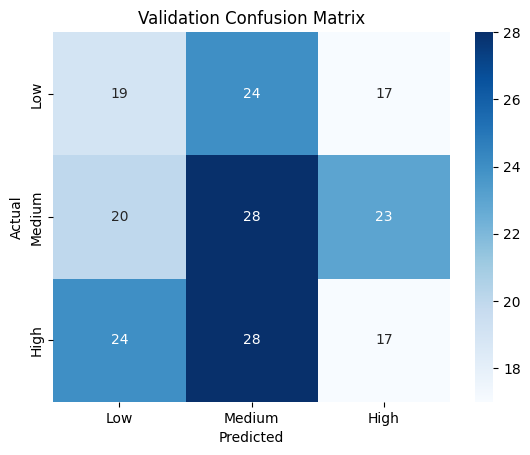

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()


In [25]:
y_test_pred = rf_model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_test_pred, target_names=['Low', 'Medium', 'High']))


Test Accuracy: 0.36

Classification Report on Test Set:
               precision    recall  f1-score   support

         Low       0.33      0.25      0.28        61
      Medium       0.33      0.44      0.38        71
        High       0.43      0.38      0.40        68

    accuracy                           0.36       200
   macro avg       0.36      0.35      0.35       200
weighted avg       0.36      0.36      0.36       200



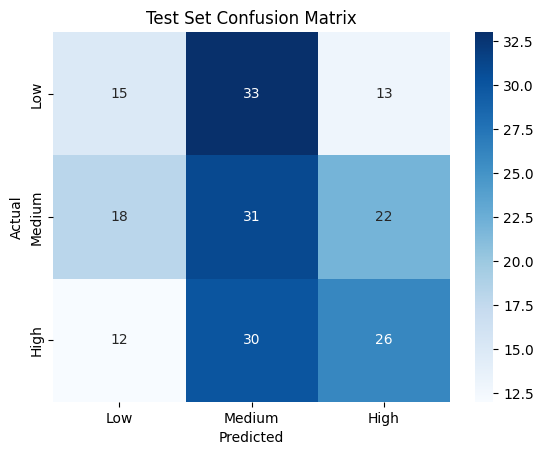

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Set Confusion Matrix')
plt.show()


In [30]:
import pandas as pd

# Özellik isimleri ve önem değerlerini birleştir
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})

# Önem sırasına göre sırala (büyükten küçüğe)
feature_importances = feature_importances.sort_values(by='importance', ascending=False)


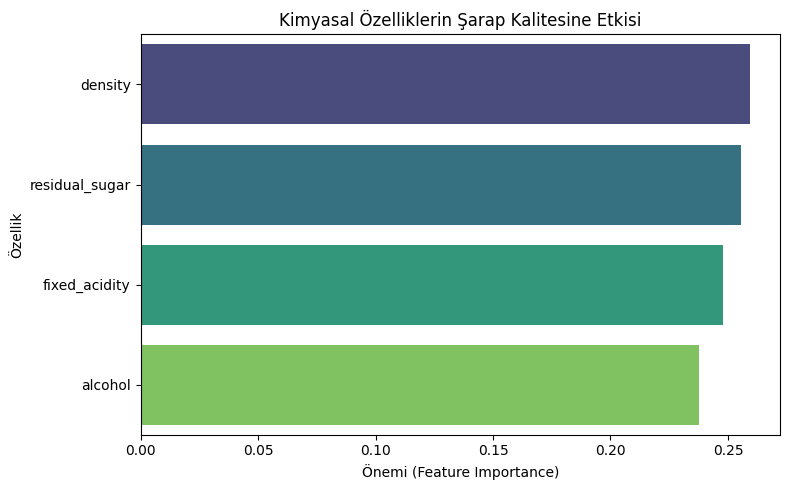

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Kimyasal Özelliklerin Şarap Kalitesine Etkisi')
plt.xlabel('Önemi (Feature Importance)')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()
